<center>
<h1><b>Homework 2</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h4>https://www.github.com/ethank5149</h4>
<h4>ethank5149@gmail.com</h4>
</br>
</br>
<h3><b>October 2, 2020</b></h3>
</center>
<hr>

Differential Equation:
$$ml^{2}\ddot{\theta}+\nu l\dot{\theta}+mgl\sin\theta=Al\cos\omega_{D}t$$
$$\downarrow$$
$$\theta''+\frac{1}{Q}\theta'+\sin\theta=\hat{A}\cos\hat{\omega}\hat{t}$$

Where:
$$\omega_0=\sqrt{\frac{g}{l}},\,\,Q=\frac{mg}{\omega_0\nu}$$
$$\hat{\omega}=\frac{\omega_D}{\omega_0},\,\,\hat{A}=\frac{A}{mg},\,\,\hat{t}=\omega_0t$$

### Imports

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from functools import partial
from tqdm import tqdm
from scipy.integrate import solve_ivp
from scipy.stats import linregress

In [5]:
plt.style.use('dark_background')

In [6]:
_phase_cut = 0  # Poincare Phase
_n = 10
_N = 10000  # Poincare Section Sample Size

_A = 1.5  # Driving 'force' amplitude
_Q = 2.0  # Quality factor
_O = 2.0 / 3.0  # CHaracteristic frequency

_theta0  = 0.2  # initial angle wrt to vertical [rad]
_dtheta0  = 0  # initial angular velocity [rad/s]

### Support Functions

In [7]:
def calculate_chaotic_pendulum_trajectory(
    n_T=_n,  # n_T : Number of Driving Force Periods
    n_P=_N,  # n_P : Number of output points
    state0=(_theta0, _dtheta0), 
    Q=_Q, 
    A=_A, 
    O=_O, 
    phase_cut=_phase_cut,  # phase_cut : shift the phase space sampling by some phase
    sectioning_freq=None  # sectioning_freq : The period of phase space samples, usually an integer multiple of the driving frequency
):
    
    theta0, dtheta0 = state0  # unpack
    t_i = (2 * np.pi + phase_cut) / O
    t_f = (2 * np.pi * n_T + phase_cut) / O  # stop after an integer multiple of the driving frequency plus the phase offset

    df = lambda t, y : np.asarray([y[1], - y[1] / Q - np.sin(y[0]) + A * np.sin(O * t)])
    
    if sectioning_freq is None:
        sol = solve_ivp(df, [0, t_f], [theta0, dtheta0], t_eval=np.linspace(t_i, t_f, n_P))
    else:
        dt = 2 * np.pi / sectioning_freq
        sol = solve_ivp(df, [0, t_f], [theta0, dtheta0], t_eval=np.arange(t_i, t_f, dt))
        
    t, (theta, omega) = sol.t, sol.y  # unpack
    theta = np.mod(theta + np.pi, 2 * np.pi) - np.pi  # Constrain theta to [-pi, pi]

    return t, theta, omega

# Problem 1

For the driven, nonlinear pendulum, investigate how the Poincare section depends on the strength of the linear dissipation term. Use the same physics parameters as the calculation in Fig. 3.6 of the Giordano-Nakanishi book. First set $F_D=0.5$, $q=0.5$, which puts you in the periodic regime, and then vary $q$ to see how the Poincare section changes. Next, repeat the same from a starting point $F_D=1.2$,$q=0.5$ in the chaotic regime. In both cases, keep all other physics parameters fixed as you vary $q$.

_Warning:_ This code takes over a day to run, I considered rewritting it in c++ for performance but ran out of time. The resulting video is included in the submission.

In [8]:
# phase_cut = 0  # Poincare Phase
# N = 10000  # Poincare Section Sample Size
# A = 1.5  # Driving 'force' amplitude
# Q = 2.0  # Quality factor
# O = 2.0 / 3.0  # CHaracteristic frequency
# state0 = [0.2, 0.0]  # Initial Condition

# nQ = 1000
# nX = N - 1
# idx = range(nQ)
# Qs = np.linspace(0.1, 10, nQ)
# data = np.zeros((nQ,2,nX))

# def thread_me(i, N=N, state0=state0, A=A, O=O, phase_cut=phase_cut, sectioning_freq=O):
#     dt = 2 * np.pi / sectioning_freq
#     t_i = (2 * np.pi + phase_cut) / sectioning_freq
#     t_f = (2 * np.pi * N + phase_cut) / sectioning_freq

#     df = lambda t, y : np.asarray([y[1], - y[1] / Qs[i] - np.sin(y[0]) + A * np.sin(O * t)])
#     sol = solve_ivp(df, [0.0, t_f], state0, t_eval=np.arange(t_i, t_f, dt))
#     sol.y[0] = np.mod(sol.y[0] + np.pi, 2 * np.pi) - np.pi
#     data[i, :, :] = sol.y

#     _, ax = plt.subplots(1,1,figsize=(1980/120, 1080/120), dpi=120)
#     ax.scatter(sol.y[0],  sol.y[1], s = 1, marker=',', alpha=0.5)
#     ax.set_title(rf'Poincare Section - $Q = {Qs[i]:0.4f}$')
#     ax.set_xlabel(r"$\theta$")
#     ax.set_ylabel(r"$\omega$")
#     ax.set_xlim(-np.pi,np.pi)
#     ax.set_ylim(-np.pi,np.pi)
#     ax.grid()
#     plt.savefig(f'HW2out_P1_images/Q{str(i).zfill(4)}.png')
#     plt.close()


# for i in tqdm(range(nQ)):
#     thread_me(i)
# np.save('HW2out_P1_output_array', data)

# Problem 2

3.4 (p.53)

For simple harmonic motion, the general form for the equation of motion is
$$\frac{d^2x}{dt^2}=-kx^{\alpha},$$
with $\alpha=1$. This has the same form as (3.2), although the variables have different names. Begin by writing a program that uses the Euler-Cromer method to solve for $x$ as a function of time according to (3.9), with $\alpha=1$ (for convenience you can take $k=1$). The subroutine described in this section can be modified to accomplish this. Show that the period of the oscillations is independent of the amplitude of the motion. This is a key feature of simple harmonic motion. Then extend your program to treat the case $\alpha=3$. This is an example of an _anharmonic_ oscillator. Calculate the period of the oscillations for several different amplitudes (amplitudes in the range $0.2$ to $1$ are good choices), and show that the period of the motion now depends on the amplitude. Give an intuitive argument to explain why the period becomes longer as the amplitude is decreased.

In [9]:
def step(f, y, dy, t, dt):
    dy = dy + f(t, y, dy) * dt
    y = y + dy * dt
    return y, dy


def dsolve(f, t, y0, dy0, step=step):
    t = np.asarray(t)
    y0 = np.asarray(y0)

    y = np.zeros((np.size(t), np.size(y0)))
    dy = np.zeros((np.size(t), np.size(dy0)))
    y[0] = y0    # Set initial condition
    dy[0] = dy0  # Set initial condition

    for i in range(np.size(t) - 1):
        y[i + 1], dy[i + 1] = step(f, y[i], dy[i], t[i], t[i + 1] - t[i])  # Step forward
    return t, y, dy


def df(t, y, dy, k, a):
    return -k * y ** a

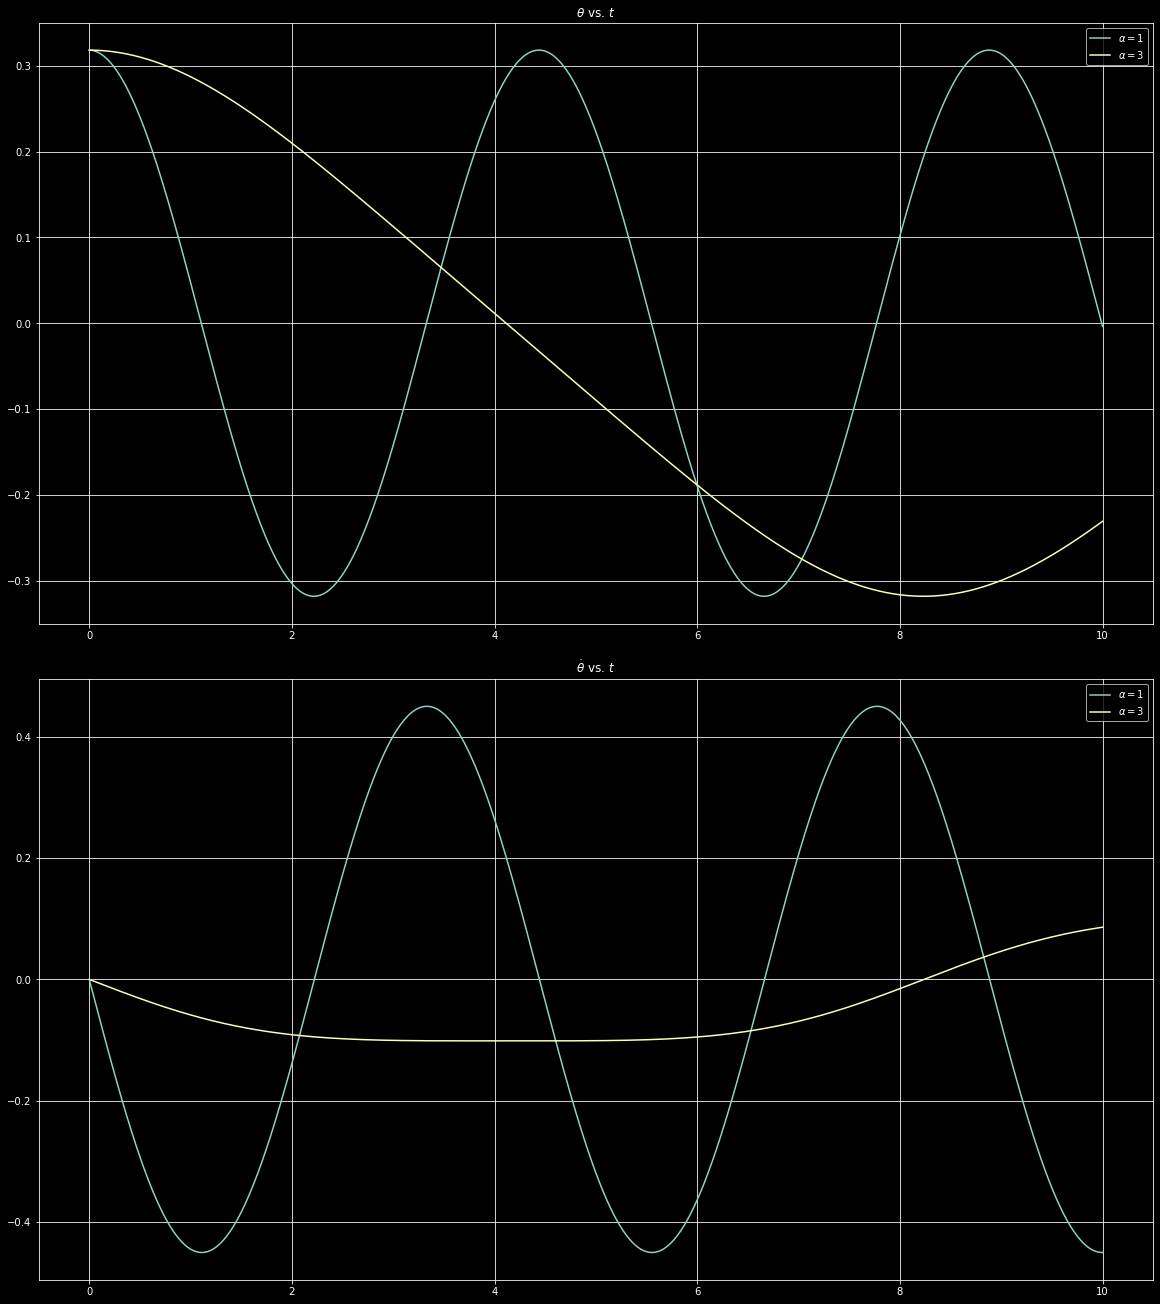

In [10]:
t = np.linspace(0, 10, 1000)
y0, dy0 = 1.0/np.pi, 0.0
df1 = partial(df, a=1, k=2)
df2 = partial(df, a=3, k=2)

t1, y1, dy1 = dsolve(df1, t, y0, dy0)
t2, y2, dy2 = dsolve(df2, t, y0, dy0)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 18), constrained_layout=True)
ax1.plot(t1, y1, label=r'$\alpha=1$')
ax1.plot(t2, y2, label=r'$\alpha=3$')
ax2.plot(t1, dy1, label=r'$\alpha=1$')
ax2.plot(t2, dy2, label=r'$\alpha=3$')
ax1.set_title(r'$\theta$ vs. $t$')
ax2.set_title(r'$\dot{\theta}$ vs. $t$')

ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()

plt.savefig('HW2out_P2a_Plot')

100%|██████████| 500/500 [00:17<00:00, 28.79it/s]


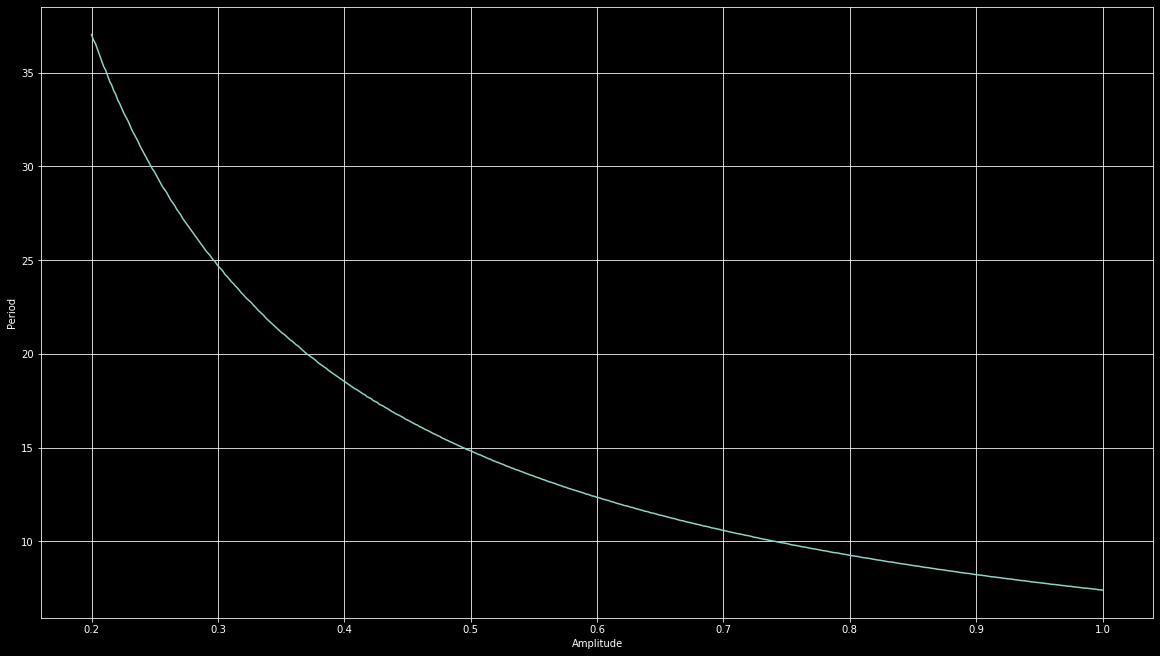

In [11]:
from scipy.signal import find_peaks

t = np.linspace(0, 100, 1000)
y0, dy0 = 1.0/np.pi, 0.0

N = 500
df = partial(df, a=3, k=1)

amplitudes = np.linspace(0.2, 1, N)
amps = []
prds = []

for A in tqdm(amplitudes):
    y0, dy0 = A, 0.0
    t, y, dy = dsolve(df, t, y0, dy0)
    peaks_idx, _ = find_peaks(y.flatten())
    if len(peaks_idx) > 1:
        peaks = np.take_along_axis(t, peaks_idx, 0)
        periods = np.diff(peaks)
        period = np.average(periods)
        amps.append(A)
        prds.append(period)


fig, ax = plt.subplots(1, 1, figsize=(16, 9), constrained_layout=True)
ax.plot(amps, prds)
ax.set_xlabel('Amplitude')
ax.set_ylabel('Period')
ax.grid()
plt.savefig('HW2out_P2b_Plot')

# Problem 3

3.5 (p.54).

For the anharmonic oscillator of (3.9) in the previous case, it is possible to analytically obtain the period of oscillation for general values of $\alpha$ in terms of certain special functions. Do this, and describe how the relationship between the period and the amplitude depends on the value of $\alpha$. Can you give a physical interpretation to the finding? _Hint:_ If you multiply both sides of (3.9) by $\frac{dx}{dt}$ you can integrate with respect to $t$. This then leads to a relation between velocity and $x$.
<hr>

Also check how well the periods computed in Problem 2 agree with the analytic results, and discuss whether the difference you find is within the expected accuracy of the numerical calculation. 

Note: There is a typo in (3.9). On the right hand side, $x^{\alpha}$ should correctly read $\text{sgn}\left(x\right)\left|x\right|^{\alpha}$, where the sign function is

$$\text{sgn}\left(x\right)=\begin{cases}+1,&\text{if }x>0\\0,&\text{if }x=0\\-1,&\text{if }x<0\\\end{cases}$$

as usual. This way the equations of motion make sense for arbitrary $\alpha>0$ (instead of only positive odd integers).
<hr>

$$\frac{d^{2}x}{dt^{2}}\frac{dx}{dt}=-kx^{\alpha}\frac{dx}{dt}\Rightarrow\int\frac{dx}{dt}\frac{d^{2}x}{dt^{2}}dt=-k\int\frac{dx}{dt}x^{\alpha}dt\Rightarrow\int v\frac{dv}{dx}dx=-k\int x^{\alpha}dx\Rightarrow\int vdv=-k\int x^{\alpha}dx\Rightarrow\frac{v^2}{2}-\frac{v_0^2}{2}=\frac{kx_0^{\alpha+1}}{\alpha+1}-\frac{kx^{\alpha+1}}{\alpha+1}$$
$$E=mk\left(\frac{x_0^{\alpha+1}-x^{\alpha+1}}{\alpha+1}+\frac{v_0^2}{2}\right),\,\,F=-mkx^{\alpha}\rightarrow U=\frac{mkx^{\alpha+1}}{\alpha+1}$$

$$T = \sqrt{2m}\int_{-A}^A\frac{dx}{\sqrt{E-U}}=\sqrt{2m}\int_{-A}^A\frac{dx}{\sqrt{mk\left(\frac{x_0^{\alpha+1}-x^{\alpha+1}}{\alpha+1}+\frac{v_0^2}{2}\right)-\frac{mkx^{\alpha+1}}{\alpha+1}}}=\sqrt{\frac{2}{k}}\int_{-A}^A\frac{dx}{\sqrt{\frac{x_0^{\alpha+1}-2x^{\alpha+1}}{\alpha+1}+\frac{v_0^2}{2}}}$$

$$T_{1}=\frac{2}{\sqrt{k}}\int_{-A}^{A}\frac{dx}{\sqrt{v_{0}^{2}+A^{2}-2x^{2}}}=\sqrt{\frac{8}{k}}\arcsin\left(A\sqrt{\frac{2k}{kA^{2}+v_{0}^{2}}}\right)$$
$$T_{3}=\frac{2}{\sqrt{k}}\int_{-A}^{A}\frac{dx}{\sqrt{v_{0}^{2}+\frac{A^{4}}{2}-x^{4}}}=\frac{4\sqrt{2}A}{\sqrt{k\left(A^{4}+2v_{0}^{2}\right)}}{}_{2}F_{1}\left(\frac{1}{4},\frac{1}{2},\frac{5}{4},\frac{2A^{4}}{A^{4}+2v_{0}^{2}}\right)$$

# Problem 4

3.13 (p.65)

Write a program to calculate and compare the behavior of two, nearly identical pendulums. Use it to calculate the divergence of two nearby trajectories in the chaotic regime, as in Figure 3.7, and make a qualitative estimate of the corresponding Lyapunov exponent from the alope of a plot of $\log\left(\Delta\theta\right)$ as a function of $t$.

$$\left|\delta\mathbf{Z}\left(t\right)\right|\approx e^{\lambda t}\left|\delta\mathbf{Z}_0\right|$$

$$\ln{\left(\frac{\left|\delta\mathbf{Z}\left(t\right)\right|}{\left|\delta\mathbf{Z}_0\right|}\right)}\approx \lambda t$$

<ipython-input-12-2e9c9978e2d5>:4: RuntimeWarning: divide by zero encountered in log
  scaled = np.log(delta_theta/delta_theta[0])
<ipython-input-12-2e9c9978e2d5>:4: RuntimeWarning: invalid value encountered in log
  scaled = np.log(delta_theta/delta_theta[0])


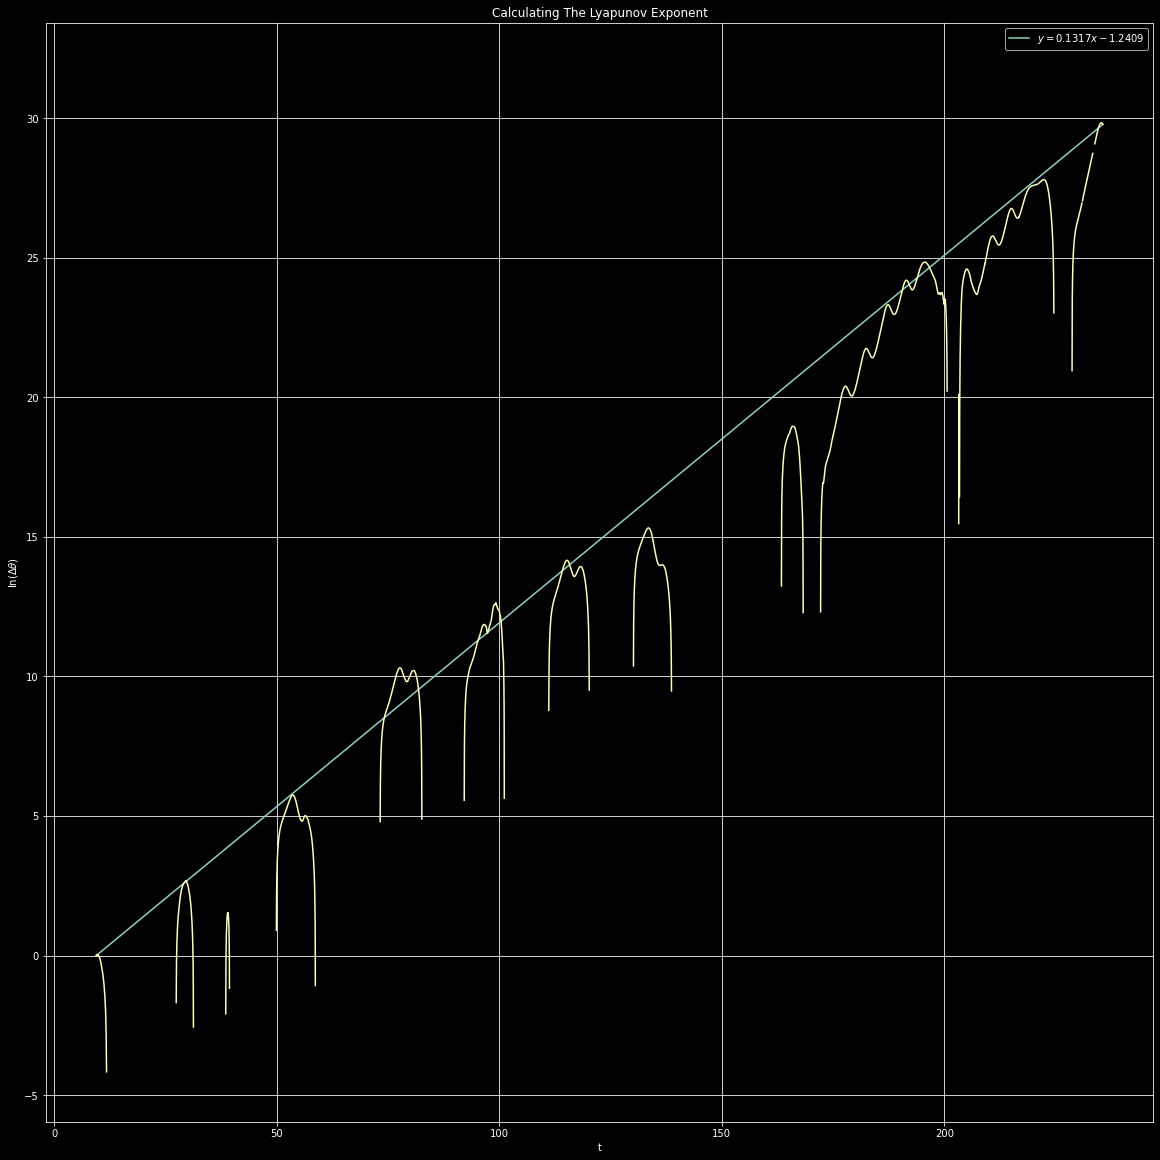

In [12]:
t1, theta1, dtheta1 = calculate_chaotic_pendulum_trajectory(n_T=25, n_P=10000, state0=(          np.pi/4., -0.1))
t2, theta2, dtheta2 = calculate_chaotic_pendulum_trajectory(n_T=25, n_P=10000, state0=(1.0e-13 + np.pi/4., -0.1))
delta_theta = theta2 - theta1
scaled = np.log(delta_theta/delta_theta[0])

t1_ = t1[~np.isnan(scaled)]
scaled_ = scaled[~np.isnan(scaled)]
slope = (scaled_[-1] - scaled_[0]) / (t1[-1] - t1[0])
intercept = scaled_[0] - t1[0] * slope

fig, ax = plt.subplots(1, 1, figsize=(16, 16), constrained_layout=True)
ax.plot(t1, intercept + slope * t1, label=rf'$y={slope:0.4f}x{intercept:0.4f}$')
ax.plot(t1, scaled)
ax.set_title(r'Calculating The Lyapunov Exponent')
ax.set_ylabel(r'$\ln\left(\Delta\theta\right)$')
ax.set_xlabel('t')
ax.legend()
ax.grid()
plt.savefig('HW2out_P4_Plot')

# Problem 5

3.20 (p.70)

Calculate the bifurcation diagram for the pendulum in the vicinity of $F_D=1.35$ to $1.5$. Make a magnified plot of the diagram (as compared to Figure 3.11) and obtain an estimate of the Feigenbaum $\delta$ parameter.

_Warning:_ This code takes a long time to run, I considered rewritting it in c++ for performance but ran out of time. The resulting plot is included in the submission.

In [13]:
# n = 10000
# last = 1
# As = np.linspace(1.35, 1.5, n)

In [1]:
# fig, ax = plt.subplots(1, 1, figsize=(16, 16))
# for i, A in enumerate(tqdm(As)):
#     t, theta, omega = calculate_chaotic_pendulum_trajectory(A=A, sectioning_freq=_O, n_T=1000, n_P=1000)
#     thetas = theta[-last:]  # Wait for transients to die down
#     ax.plot([A] * thetas.size, thetas, ',r', alpha=.5)

# ax.set_ylim(0, np.pi)
# ax.set_xlabel(r'$A$')
# ax.set_ylabel(r'$\theta\left(t_f\right)$')
# ax.set_title("Bifurcation Diagram")
# plt.savefig('HW2out_P5_Plot')